# Carga de libreias

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from tensorflow.keras.layers import *
from tensorflow.keras import *
from PIL import Image, ImageFilter, ImageOps

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
Aqui conoceran primero como saber si su computadora posee un GPU que haya reconocido tensorflow, esto puede hacer la diferencia entre un entrenamiento de pocas horas y un entrenamiento de semanas.

In [2]:
tf.config.experimental.list_physical_devices('GPU') #Probar que tenga GPU

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


# Declaracion de rutas.
Estas rutoas deberian mopdificarla para u propia computadora.

In [4]:
Path="/home/mario/Documentos/Clase_mintic/Datos/RedNeuronal/Fotos"
OUPath=Path+"/"+"OuIm"
INPath=Path+"/"+"InIm"
CKPath=Path+"/"+"checkpoint"
files = [f.split("/")[-1] for f in glob.glob(INPath + "/*.jpg", recursive=True)]
files =files+[f for f in glob.glob(INPath + "/*.JPG", recursive=True)]
files= [f.split("/")[-1] for f in files]

In [5]:
files

['HPIM0171.JPG',
 'IMG_0277.JPG',
 'DSCF9204.JPG',
 'DSCF5081.JPG',
 'IMG_7577.JPG',
 'IMG_0300.JPG',
 'IMG_0034.JPG',
 'HPIM0222.JPG',
 'DSCF1498.JPG',
 'DSCF1280.JPG',
 'DSCF9114.JPG',
 'IMG_1057.JPG',
 'IMG_0003.JPG',
 'IMG_1059.JPG',
 'DSC00846.JPG',
 'DSCF5119.JPG',
 'DSCF9136.JPG',
 'DSCF5008.JPG',
 'DSCF5080.JPG',
 'IMG_1058.JPG',
 'DSCF9004.JPG',
 'DSCF1496.JPG',
 'DSC00845.JPG',
 'IMG_0052.JPG',
 'DSCF3032.JPG',
 'IMG_0279.JPG',
 'DSCF9146.JPG',
 'HPIM0221.JPG',
 'DSCF1390.JPG',
 'DSCF1540.JPG',
 'DSCF9115.JPG',
 'DSCF7172.JPG',
 'DSCF1497.JPG',
 'DSCF9118.JPG',
 'DSCF1412.JPG',
 'DSCF9190.JPG',
 'IMG_1055.JPG',
 'DSCF1291.JPG',
 'HPIM0219.JPG',
 'DSCF5021.JPG',
 'IMG_0035.JPG',
 'IMG_0194.JPG',
 'IMG_7584.JPG',
 '2.JPG',
 'IMG_0102.JPG',
 'DSCF7171.JPG',
 'DSCF9148.JPG',
 'DSCF1464.JPG',
 'DSCF5055.JPG',
 'DSCF5034.JPG',
 'DSCF9016.JPG',
 'IMG_0135.JPG',
 '1.JPG',
 'DSC00844.JPG',
 'DSCF5120.JPG',
 'IMG_1060.JPG',
 'DSCF5122.JPG']

# Acondicionar Set de datos

In [7]:
n = 50 # Set total 
train_n = round ( n * 0.8 )
randfiles = files.copy()
np.random.seed(23)
np.random.shuffle(randfiles)
tr_url = randfiles[:train_n] 
ts_url = randfiles[train_n:n]

In [8]:
print(len(tr_url),len(files))#Tamaño de training y de 

40 57


In [9]:
tr_url

['DSCF1540.JPG',
 'DSCF3032.JPG',
 'DSCF5055.JPG',
 'DSCF1498.JPG',
 'DSCF1390.JPG',
 'DSCF5080.JPG',
 'DSC00844.JPG',
 'IMG_0135.JPG',
 'IMG_1055.JPG',
 'DSCF1412.JPG',
 'DSCF9136.JPG',
 'DSCF1464.JPG',
 'DSCF5008.JPG',
 'DSC00846.JPG',
 'IMG_0102.JPG',
 'IMG_0052.JPG',
 'IMG_1059.JPG',
 'IMG_1060.JPG',
 'DSCF5081.JPG',
 'DSCF1291.JPG',
 'DSCF9114.JPG',
 'IMG_7584.JPG',
 'DSCF9016.JPG',
 'DSCF9118.JPG',
 'HPIM0222.JPG',
 'DSC00845.JPG',
 'DSCF1497.JPG',
 'IMG_0194.JPG',
 'DSCF9004.JPG',
 'DSCF9115.JPG',
 'IMG_0277.JPG',
 'IMG_7577.JPG',
 'DSCF9190.JPG',
 'DSCF5122.JPG',
 'DSCF9148.JPG',
 'DSCF5119.JPG',
 '1.JPG',
 '2.JPG',
 'HPIM0171.JPG',
 'IMG_0300.JPG']

In [10]:
#Tamaño imagen
img_h=1152
img_w=1152

def resizeimage(inimg,tgimg,heigth,width):
    inimg=tf.image.resize(inimg,[heigth,width])
    tgimg=tf.image.resize(tgimg,[heigth,width])
    return inimg,tgimg

def normalizeimage(inimg,tgimg):
    inimg = (inimg / 127.5)-1
    tgimg = (tgimg/ 127.5)-1
    return inimg , tgimg

def random_jitter(inimg,tgimg):
    # reescala de a 1152 x 1152 x 3
  
    stacked_image = tf.stack([inimg,tgimg], axis=0)
    cropped_image = tf.image.random_crop(stacked_image, size=[2, img_h, img_w, 3])
    inimg , tgimg = cropped_image[0], cropped_image[1]
    # randomly cropping to 1152 x 1152 x 3

    if tf.random.uniform(()) > 0.5:
        # Aleatorioamente voltea de forma horizontal la imagen
        inimg = tf.image.flip_left_right(inimg)
        tgimg = tf.image.flip_left_right(tgimg)

    return inimg,tgimg

In [11]:
def load_image(image_file,augument=True):
    in_image_file = INPath+"/"+image_file
    tg_image_file = OUPath+"/"+image_file
    inimg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(in_image_file)), tf.float32)[..., :3]
    tgimg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(tg_image_file)), tf.float32)[..., :3]
    inimg, tgimg = resizeimage(inimg,tgimg,img_h,img_w)
    if augument:
        inimg, tgimg = random_jitter(inimg,tgimg)
    inimg, tgimg = normalizeimage(inimg,tgimg)
    return inimg,tgimg
def load_train_image(filename):
    return load_image(filename,True)
def load_test_image(filename):
    return load_image(filename,False)

In [36]:
tg_url=['1.JPG',
 '2.JPG']

In [37]:
testg_dataset = tf.data.Dataset.from_tensor_slices(tg_url)
testg_dataset = testg_dataset.map(load_test_image,num_parallel_calls=tf.data.experimental.AUTOTUNE)
testg_dataset = testg_dataset.batch(1)

Una foto de entrenamiento

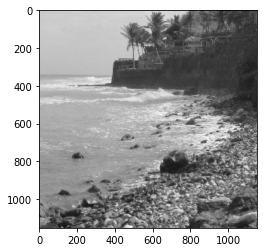

In [38]:
plt.imshow((load_train_image(files[1])[0]+1)/2)

In [39]:
train_dataset = tf.data.Dataset.from_tensor_slices(tr_url)
train_dataset = train_dataset.map(load_train_image,num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.batch(1)

test_dataset = tf.data.Dataset.from_tensor_slices(ts_url)
test_dataset = test_dataset.map(load_test_image,num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(1)

Solo para que entiendan un poco esto esta haciendo los grupos de entrenamiento y de prueba, ustedes pueden verificar imagenes en especifico con el comando de abajo. Noten que esos son matices, que les dice la intesisdad de un canal de color (ROJO, AZUL, VERDE)

In [40]:
testg_dataset.take(1)

<TakeDataset shapes: ((None, 1152, 1152, None), (None, 1152, 1152, None)), types: (tf.float32, tf.float32)>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(
[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[0.67229056 0.67229056 0.67229056]
   [0.67834795 0.67834795 0.67834795]
   [0.690505   0.690505   0.690505  ]
   ...
   [0.93866515 0.93866515 0.93866515]
   [0.937678   0.937678   0.937678  ]
   [0.937186   0.937186   0.937186  ]]

  [[0.61357474 0.61357474 0.613574

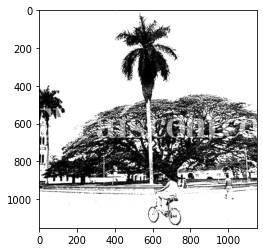

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


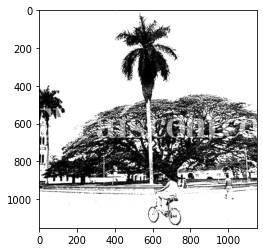

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(
[[[[ 0.4901961   0.4901961   0.4901961 ]
   [ 0.48980796  0.48980796  0.48980796]
   [ 0.48432052  0.48432052  0.48432052]
   ...
   [-0.12450647 -0.12450647 -0.12450647]
   [-0.12176251 -0.12176251 -0.12176251]
   [-0.12156862 -0.12156862 -0.12156862]]

  [[ 0.48848045  0.48848045  0.48848045]
   [ 0.48810434  0.48810434  0.48810434]
   [ 0.48278844  0.48278844  0.48278844]
   ...
   [-0.12487411 -0.12487411 -0.12487411]
   [-0.12213016 -0.12213016 -0.12213016]
   [-0.12193626 -0.12193626 -0.12193626]]

  [[ 0.45073533  0.45073533  0.45073533]
   [ 0.45062613  0.45062613  0.45062613]
   [ 0.44908285  0.44908285  0.44908285]
   ...
   [-0.13296235 -0.13296235 -0.13296235]
   [-0.13021839 -0.13021839 -0.13021839]
   [-0.1300245  -0.1300245  -0.1300245 ]]

  ...

  [[ 0.2985294   0.2985294   0.2985294 ]
   [ 0.2985294   0.2985294   0.2985294 ]
   [ 0.2985294   0.2985294   0.2985294 ]
   ...
   [ 0.18161762  0.18161762  0.18161762]
   [ 0.18161762  0.18161762  0.18161762]
   [ 

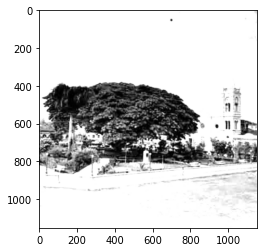

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


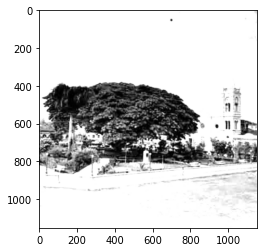

In [42]:
for i , j in testg_dataset.take(2):
    print(i)
    plt.imshow((i[0,...]+1))
    plt.show()
    plt.imshow((j[0,...]+1))
    plt.show()

In [16]:
tr_url

['DSC00845.JPG',
 'DSCF3032.JPG',
 'DSC00846.JPG',
 'DSCF5080.JPG',
 'DSCF5008.JPG',
 'DSCF1412.JPG',
 'DSC00844.JPG',
 'DSCF1291.JPG',
 'DSCF1540.JPG',
 'DSCF9136.JPG',
 'IMG_7584.JPG',
 'DSCF1498.JPG',
 'IMG_1055.JPG',
 'DSCF5081.JPG',
 'IMG_1059.JPG',
 'DSCF9190.JPG',
 'DSCF9114.JPG',
 'IMG_0135.JPG',
 'DSCF1497.JPG',
 'DSCF9016.JPG',
 'DSCF5034.JPG',
 'DSCF9004.JPG',
 'IMG_0052.JPG',
 'DSCF1390.JPG',
 'IMG_7577.JPG',
 'DSCF9118.JPG',
 'HPIM0222.JPG',
 'DSCF1464.JPG',
 'IMG_0277.JPG',
 'DSCF5122.JPG',
 'IMG_0102.JPG',
 'DSCF9115.JPG',
 'DSCF7171.JPG',
 'DSCF5119.JPG',
 'IMG_1060.JPG',
 'IMG_0194.JPG',
 'HPIM0171.JPG',
 'IMG_0300.JPG',
 'DSCF1496.JPG',
 'IMG_1057.JPG']

# Plantenamiento de la red.
Aunque tal vez no es la red mas basica que les permita aprender facilemte es una red (Varias redes juntas) para poderle enseñar a una red algo simple con una imagen en escala de grises devolver una imagen a color equivalente.

Este tipo de red es llamada red adversaria, basicamte una red intenta generar imagenes desde el set de entrenamiento mientras la otra red intenta detectar cuando son falsas.

El proceso a lo interno usa convoluciones, el cual conciste en un conteo respecto a los vecinos con una ventana prefijada.

El principio es que downsample elimina informacion con cada secuencia, mientras upsample intenta recuperar informacion, desde la simplicicacion que hizo downsample


In [20]:
def downsample(filters, apply_batchnorm=True,stri=2):
    initialazer=tf.random_normal_initializer(0,0.02)
    result=Sequential()# Es la forma de entrar la configuracion de la red
    result.add(Conv2D(filters,kernel_initializer=initialazer,kernel_size=4,strides=stri,padding="same",use_bias=not apply_batchnorm))#Convolucion, datos importantes el kernel size les dice el tamaño del cuadro que usan para el calculo y filters son los filtros
    if apply_batchnorm:
        #Capa de BatchNorm.
        result.add(BatchNormalization())# Este acota los numeros creo la media cerca de cero y desviacion estandar cerca de 1
    result.add(LeakyReLU())#Tambien una capa para acotar los numeros
    return result
#downsample(45)

In [21]:
def upsample(filters, apply_dropout=False,stri=2):
    result = Sequential()
    initializer = tf.random_normal_initializer(0, 0.02)
    result.add(Conv2DTranspose(filters,
                             kernel_size=4,
                             strides=stri,
                             padding="same",
                             kernel_initializer=initializer,
                             use_bias=False))
    result.add(BatchNormalization())
    if apply_dropout:
        result.add(Dropout(0.5))
    result.add(ReLU())
    return result

#upsample(64)

In [22]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits = True)
def Generator():
    inputs = tf.keras.layers.Input(shape=[None,None,3])
    down_stack = [
    downsample(64, apply_batchnorm=False), # (bs, 1152, 1152, 64)
    downsample(128), # (bs, 526,  526, 128)
    downsample(256), # (bs, 268,268, 256)
    downsample(512), # (bs, 134, 134, 512)
    downsample(512), # (bs, 67, 67, 512)
    ]

    up_stack = [
    upsample(512, apply_dropout=True),#(bs, 67, 67, 512)
    upsample(512), # (bs, 134, 134, 512)
    upsample(256), # (bs, 268,268, 256)
    upsample(128), # (bs, 526,  526, 128)
    upsample(64), # (bs, 1152, 1152, 64)
    ]
    initializer = tf.random_normal_initializer(0, 0.02)
    last = Conv2DTranspose(filters = 3,
                         kernel_size = 4,
                         strides=2,
                         padding='same',
                         kernel_initializer=initializer,
                         activation='tanh') # (bs,1152, 1152, 3)
   
    x = inputs
    s = []
    concat = Concatenate()
    for down in down_stack:
        x = down(x)
        s.append(x)
    s = reversed(s[:-1])
    # Upsampling and establishing the skip connections
    for up, sk in zip(up_stack, s):
        x = up(x)
        x = concat([x, sk])
    last = last(x)
    return Model(inputs=inputs, outputs=last)
generator = Generator()

(1, 1152, 1152, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


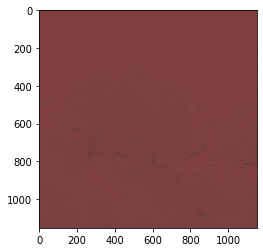

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


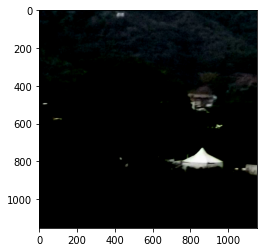

In [23]:
#generator((i[0,...]+1)*255,training=False)

for i , j in test_dataset.take(1):
    print(j.shape)
    a=generator((i+1)*255,training=False)
    plt.imshow(a[0,...])
    plt.show()  
    plt.imshow(j[0,...])
    plt.show()  

In [24]:
def Discriminator():
    ini = Input(shape=[None, None, 3], name="input_img")
    gen = Input(shape=[None, None, 3], name="gener_img")
    con = concatenate([ini, gen])#(bs, 1152, 1152, 2*Canales)
    initializer = tf.random_normal_initializer(0, 0.02)
    down1 = downsample(64, apply_batchnorm=False)(con)#(bs, 526,  526, 64)
    down2 = downsample(128)(down1)#(bs, 268,268, 128)
    #down2 = downsample(128)(down2a)
    down3 = downsample(256)(down2)#(bs, 134, 134, 256)
    down4 = downsample(512)(down3)#(bs, 67, 67, 512)
    last = tf.keras.layers.Conv2D(filters=1,
                              kernel_size=4,
                              strides=1,
                              kernel_initializer=initializer,
                              padding="same")(down4)#(bs, 67, 67, 1)
    return tf.keras.Model(inputs=[ini, gen],outputs=last)


discriminator= Discriminator()

(1, 1152, 1152, 3)


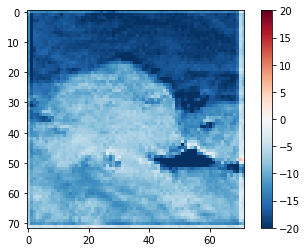

In [25]:
for i , j in test_dataset.take(1):
    print(j.shape)
    a=generator((j+1)*255,training=False)
    b=discriminator([(j+1)*255,a],training=False)
    plt.imshow(b[0,...,-1],vmin=-20,vmax=20,cmap="RdBu_r")
    plt.colorbar()
    plt.show()

Las proximas funciones solo calculan, la diferencia entre la imagen real y la generada, con esto el discriminador puede saber que tan bueno es y mejorar con cada ejemplo mostrado, mientras el generador tambien puede saber si el discriminador lo detectam mejor para mejorar sus datos generados.

In [26]:
def discriminator_loss(disc_real_output,disc_generated_output):  
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss

In [27]:
LAMBDA = 100
def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
    total_gen_loss = gan_loss + (LAMBDA * l1_loss)
    return total_gen_loss

Hasta aca fue la logica de la red.
El proximo paso es como les dije en cada ciclo ellos aprenden y una funcion que hace ese calculo es tf.keras.optimizers.Adam.
Pero ademas hay un pequeño codigo que si encuentra una red salvada la carga (Esto puede ppermitir seguir entrenado o usar la red entrenada para hacer mas cosas)

In [28]:
generator_optimizer     = tf.keras.optimizers.Adam(2e-4, beta_1 = 0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1 = 0.5)

checkpoint_prefix = os.path.join(CKPath, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer = generator_optimizer,
                                discriminator_optimizer = discriminator_optimizer,
                                generator = generator,
                                discriminator = discriminator)
checkpoint.restore(tf.train.latest_checkpoint(CKPath))#.assert_consumed()


El codigo lo que hace es generar las imagenes desde la red entrenada.

In [29]:
def generate_images(model,test_input, tar,save_filename=False,display_imgs=True):
    prediction = model(test_input, training=True)
    if save_filename:
        tf.keras.preprocessing.image.save_img(Path + '/V1/' + save_filename + '.jpg', prediction[0,...])
    plt.figure(figsize=(10,10))
  
    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']
  
    if display_imgs:
        for i in range(3):
            plt.subplot(1,3, i+1)
            plt.title(title[i])
            plt.imshow(display_list[i] * 0.5 + 0.5)
            plt.axis('off')
    plt.show()
    
    


Aqui defino la funcion de entrenamiento, y que muestre algunos ejemplos de lo que esta entrenando. Podran ver que la de la izquierda es la imagen original, luego en le medio esta la imagen origial sin quitarle el color y a la derecha la imagen que ra red intento ponerle color.



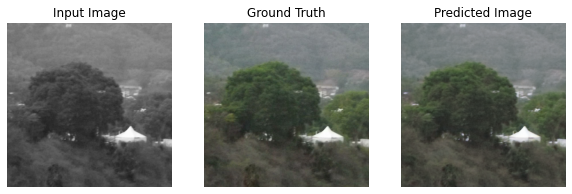

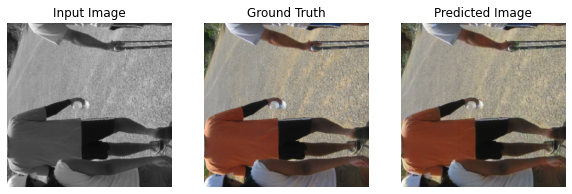

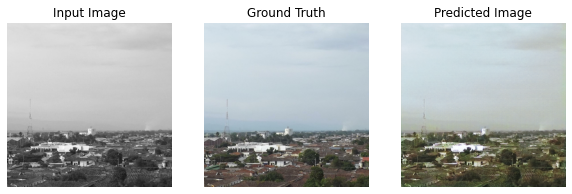

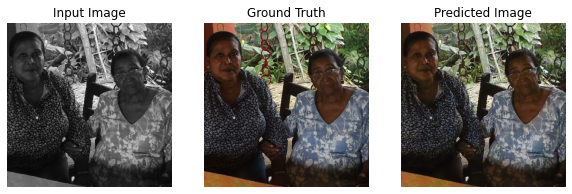

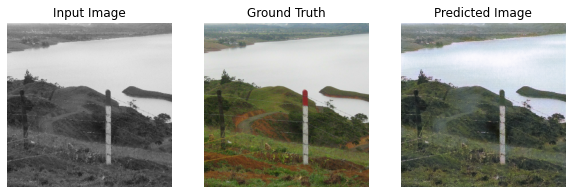

In [30]:
from IPython.display import clear_output
def train(dataset, epochs):
    for epoch in range(epochs):
        imgi = 0
        for input_image,target in dataset:
            print('epoch' + str(epoch) + ' - train: ' + str(imgi) + '/'+str(len(tr_url)))
            imgi+=1
            train_step(input_image, target)
            if epoch% 2==0:
                clear_output(wait=True)
        imgi = 0
        for inp, tar in test_dataset.take(5):
            generate_images(generator, inp, tar, str(imgi) + '_' + str(epoch), display_imgs=True)
            imgi += 1
        if ( epoch + 1)%100 ==0:
            checkpoint.save(file_prefix = checkpoint_prefix)

@tf.function()
def train_step(input_image, target):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as discr_tape:
        output_image = generator(input_image, training = True)
        output_gen_discr = discriminator([ input_image, output_image], training = True)
        output_trg_discr = discriminator([ input_image,target], training = True)
        
        discr_loss = discriminator_loss(output_trg_discr, output_gen_discr)
        gen_loss = generator_loss(output_gen_discr, output_image, target)
        
        generator_grads = gen_tape.gradient(gen_loss, generator.trainable_variables)
        discriminator_grads = discr_tape.gradient(discr_loss, discriminator.trainable_variables) 
        generator_optimizer.apply_gradients(zip(generator_grads, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(discriminator_grads, discriminator.trainable_variables))
# Run the trained model on the entire test dataset
num=0
for inp, tar in test_dataset.take(5):# PARA MAYOR CLARIDAD ESTO DEBERIA HABERLO PUESTO EN OTRA CELDA, ESTE CODIGO GENERA LAS IMAGENES DE ABAJO PERO NO TIENE QUE EJECUTARSE EN LA MISMA CELDA QUE DONDE SE DEFINE LAS FUNCIONES....
  #generate_images(generator, inp, tar)
    num +=1
    generate_images(generator, inp, tar, str(num) , display_imgs=True)
#train(train_dataset, 100)

In [28]:
train(train_dataset, 1000)#ESTO ESTABA PENSADO PARA ENTRENAR 1000 EPOCH PERO PERDI LA PACIENCIA A LAS 8 HORAS...

epoch616 - train: 5/40


KeyboardInterrupt: 

Pero claramente que trabaje desde las imágenes que se entreno es un poco injusto tiene mucha información. Que tal conseguir fotos viejas de Guacari para ver como trabaja esto.

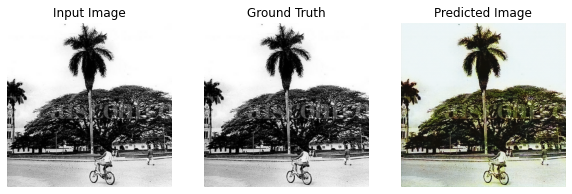

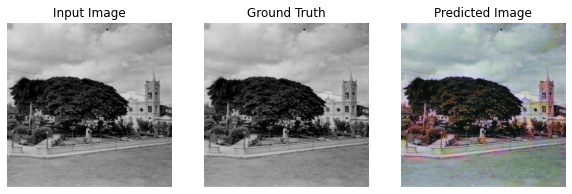

In [43]:
num=0
for inp, tar in testg_dataset.take(2):
  #generate_images(generator, inp, tar)
    num +=1
    generate_images(generator, inp, tar, str(num) , display_imgs=True)


In [ ]:
for i in train_dataset:
    print(i)
    plt.imshow(i)
    plt.imshow((load_train_image(files[1])[0]+1)/2)

(<tf.Tensor: shape=(1, 1152, 1152, 3), dtype=float32, numpy=
array([[[[-0.35686272, -0.35686272, -0.35686272],
         [-0.38823527, -0.38823527, -0.38823527],
         [-0.3098039 , -0.3098039 , -0.3098039 ],
         ...,
         [ 0.00392163,  0.00392163,  0.00392163],
         [-0.01176471, -0.01176471, -0.01176471],
         [-0.03529412, -0.03529412, -0.03529412]],

        [[-0.32549018, -0.32549018, -0.32549018],
         [-0.372549  , -0.372549  , -0.372549  ],
         [-0.3098039 , -0.3098039 , -0.3098039 ],
         ...,
         [-0.00392157, -0.00392157, -0.00392157],
         [-0.01176471, -0.01176471, -0.01176471],
         [-0.02745098, -0.02745098, -0.02745098]],

        [[-0.30196077, -0.30196077, -0.30196077],
         [-0.35686272, -0.35686272, -0.35686272],
         [-0.30196077, -0.30196077, -0.30196077],
         ...,
         [-0.00392157, -0.00392157, -0.00392157],
         [-0.00392157, -0.00392157, -0.00392157],
         [-0.01176471, -0.01176471, -0.0117